In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

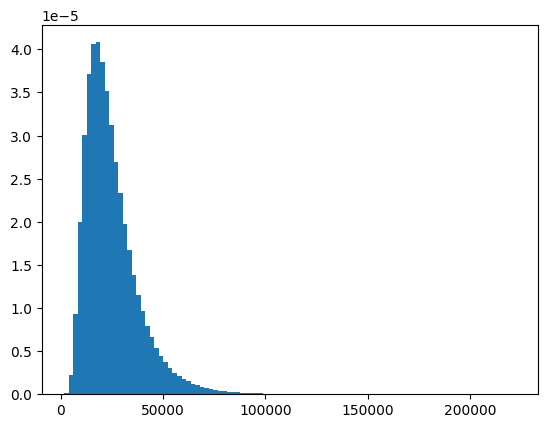

In [2]:
distribution = np.random.lognormal(mean=10, sigma=0.5, size=int(2000000))
count,bins,ignored = plt.hist(distribution,100,density=True)

/var/folders/55/j0v2zlbn1575rkmztsycxlfw0000gn/T/ipykernel_62361/4012756577.py:26: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  times = pd.date_range(start=date, periods=num_transactions, freq='S').to_pydatetime()


eventTypes
Completed    18840639
Pending       2216143
Failed        1105193
Name: count, dtype: int64
Total transactions: 22161975


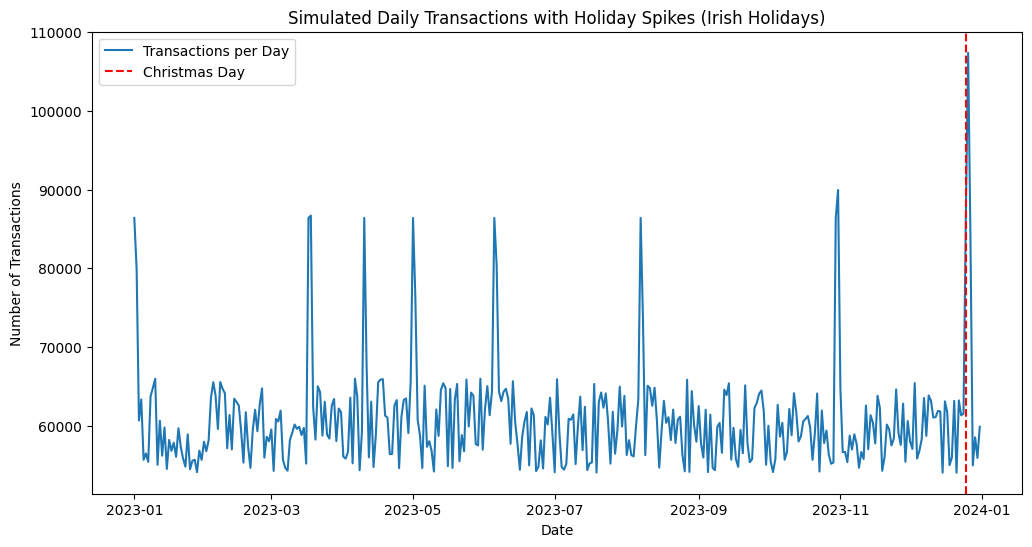

In [4]:
np.random.seed(42)
days = 365 
date_range = pd.date_range(start='2023-01-01', periods=days, freq='D')


def generate_transactions_for_day(date, base_transactions, holiday=False):
    if holiday:
        num_transactions = int(base_transactions * np.random.uniform(1.5, 2.0))  # More transactions during holidays
    else:
        num_transactions = int(base_transactions * np.random.uniform(0.9, 1.1))  # Small random variation on normal days


    payment_types = np.random.choice(
        ['Credit', 'Debit', 'Transfer', 'Refund'], 
        size=num_transactions, 
        p=[0.50, 0.30, 0.15, 0.05]  
    )
    
    event_types = np.random.choice(
        ['Completed', 'Pending', 'Failed'], 
        size=num_transactions, 
        p=[0.85, 0.10, 0.05]
    )
    
    amounts = np.random.lognormal(mean=9.5, sigma=0.5, size=num_transactions)
    times = pd.date_range(start=date, periods=num_transactions, freq='S').to_pydatetime()
    
    return pd.DataFrame({
        '_time': times,
        'Amount': amounts,
        'paymentType': payment_types,
        'eventTypes': event_types
    })


holidays = [
    '2023-01-01',  # New Year's Day
    '2023-03-17',  # St. Patrick's Day
    '2023-04-10',  # Easter Monday
    '2023-05-01',  # May Day
    '2023-06-05',  # June Bank Holiday
    '2023-08-07',  # August Bank Holiday
    '2023-10-30',  # October Bank Holiday
    '2023-12-25',  # Christmas Day
    '2023-12-26'   # St. Stephen's Day
]
holidays = pd.to_datetime(holidays)

# Base number of transactions per day (60k)
base_transactions = 60000


all_transactions = []
for date in date_range:
    holiday = date in holidays
    day_transactions = generate_transactions_for_day(date, base_transactions, holiday=holiday)
    all_transactions.append(day_transactions)

df = pd.concat(all_transactions, ignore_index=True)


print(df['eventTypes'].value_counts())
print(f"Total transactions: {len(df)}")

df['_time'] = pd.to_datetime(df['_time'])
df.set_index('_time', inplace=True)
df_daily = df.resample('D').size()

plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily.values, label='Transactions per Day')
plt.title('Simulated Daily Transactions with Holiday Spikes (Irish Holidays)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.axvline(pd.Timestamp('2023-12-25'), color='r', linestyle='--', label='Christmas Day')
plt.legend()
plt.show()

In [5]:
df['paymentType'].value_counts()

paymentType
Credit      11084023
Debit        6646443
Transfer     3324152
Refund       1107357
Name: count, dtype: int64

In [6]:
df['eventTypes'].value_counts()

eventTypes
Completed    18840639
Pending       2216143
Failed        1105193
Name: count, dtype: int64

In [7]:
df.to_csv('payment_data.csv',index=True)